In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats


# Load the data
df = pd.read_csv("../data/weather/nyc_jan2020_mar2023.csv")

df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york city,2020-01-01T00:00:00,41.0,33.6,30.6,66.29,0.0,0,NaN,0.0,...,1004.3,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
1,new york city,2020-01-01T01:00:00,39.8,32.9,28.8,64.50,0.0,0,NaN,0.0,...,1004.3,33.6,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
2,new york city,2020-01-01T02:00:00,39.8,32.8,29.7,66.99,0.0,0,NaN,0.0,...,1004.7,87.9,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
3,new york city,2020-01-01T03:00:00,38.9,30.8,28.8,66.76,0.0,0,NaN,0.0,...,1005.1,29.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
4,new york city,2020-01-01T04:00:00,38.9,33.7,26.8,61.35,0.0,0,NaN,0.0,...,1005.5,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              28463 non-null  object 
 1   datetime          28463 non-null  object 
 2   temp              28463 non-null  float64
 3   feelslike         28463 non-null  float64
 4   dew               28463 non-null  float64
 5   humidity          28463 non-null  float64
 6   precip            28463 non-null  float64
 7   precipprob        28463 non-null  int64  
 8   preciptype        3620 non-null   object 
 9   snow              28463 non-null  float64
 10  snowdepth         28463 non-null  float64
 11  windgust          15908 non-null  float64
 12  windspeed         28463 non-null  float64
 13  winddir           28463 non-null  float64
 14  sealevelpressure  28463 non-null  float64
 15  cloudcover        28463 non-null  float64
 16  visibility        28463 non-null  float6

In [3]:
df['stations'].value_counts()

72505394728,72055399999,KLGA,KJRB,F1417,KNYC,72503014732    11227
72505394728,72055399999,KLGA,KJRB,KNYC,72503014732           8979
72505394728,KLGA,KNYC,72503014732                            3493
72505394728,KLGA,F1417,KNYC,72503014732                      3115
72505394728,KLGA,F8726,KNYC,72503014732                       350
72505394728,72055399999,KLGA,KJRB,F8726,KNYC,72503014732      299
D9152,72505394728,KLGA,KNYC,72503014732                       118
72505394728,72055399999,KLGA,KJRB,F1417,KNYC                  118
72505394728,KLGA,KJRB,F1417,KNYC,72503014732                  115
72505394728,72055399999,KLGA,KJRB,KNYC                         88
72505394728,72055399999,KLGA,KJRB,F1417,72503014732            86
72505394728,KLGA,KJRB,KNYC,72503014732                         86
72505394728,72055399999,KLGA,KJRB,72503014732                  65
725,053,947,287,205,000,000,000,000,000,000                    41
KLGA,KJRB,F1417,KNYC                                           38
7250539472

In [4]:
df['datetime'].value_counts()

2022-11-06T01:00:00    2
2020-11-01T01:00:00    2
2021-11-07T01:00:00    2
2022-03-01T10:00:00    1
2022-03-01T21:00:00    1
                      ..
2021-01-30T05:00:00    1
2021-01-30T04:00:00    1
2021-01-30T03:00:00    1
2021-01-30T02:00:00    1
2023-03-31T23:00:00    1
Name: datetime, Length: 28460, dtype: int64

In [5]:
df['datetime']= pd.to_datetime(df['datetime'])
df['date']= df['datetime'].dt.date
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
0,new york city,2020-01-01 00:00:00,41.0,33.6,30.6,66.29,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,32.9,28.8,64.50,0.0,0,NaN,0.0,...,33.6,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,32.8,29.7,66.99,0.0,0,NaN,0.0,...,87.9,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,30.8,28.8,66.76,0.0,0,NaN,0.0,...,29.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,33.7,26.8,61.35,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,51.1,40.7,67.56,0.0,0,NaN,0.0,...,99.8,9.9,7.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,46.7,40.8,73.40,0.0,0,NaN,0.0,...,100.0,9.9,2.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,51.2,43.0,73.52,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,53.9,45.0,71.67,0.0,0,NaN,0.0,...,100.0,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31


In [6]:
df[df['datetime']=='2022-11-06T01:00:00']

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
24960,new york city,2022-11-06 01:00:00,65.7,65.7,60.8,84.32,0.0,0,NaN,0.0,...,88.8,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06
24961,new york city,2022-11-06 01:00:00,66.0,66.0,61.0,83.91,0.0,0,NaN,0.0,...,60.4,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              28463 non-null  object        
 1   datetime          28463 non-null  datetime64[ns]
 2   temp              28463 non-null  float64       
 3   feelslike         28463 non-null  float64       
 4   dew               28463 non-null  float64       
 5   humidity          28463 non-null  float64       
 6   precip            28463 non-null  float64       
 7   precipprob        28463 non-null  int64         
 8   preciptype        3620 non-null   object        
 9   snow              28463 non-null  float64       
 10  snowdepth         28463 non-null  float64       
 11  windgust          15908 non-null  float64       
 12  windspeed         28463 non-null  float64       
 13  winddir           28463 non-null  float64       
 14  sealevelpressure  2846

In [8]:
df.isna().sum()

name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          24843
snow                    0
snowdepth               0
windgust            12555
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy         12192
uvindex                 0
severerisk          17767
conditions              0
icon                    0
stations                0
date                    0
dtype: int64

In [9]:
df['preciptype'].value_counts()

rain                3221
snow                 229
rain,snow            138
freezingrain          19
ice                   10
freezingrain,ice       2
rain,ice               1
Name: preciptype, dtype: int64

In [10]:
df['precipprob'].describe()

count    28463.000000
mean         9.468433
std         29.278357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: precipprob, dtype: float64

In [11]:
df['precip'].describe()

count    28463.000000
mean         0.002626
std          0.021788
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.445000
Name: precip, dtype: float64

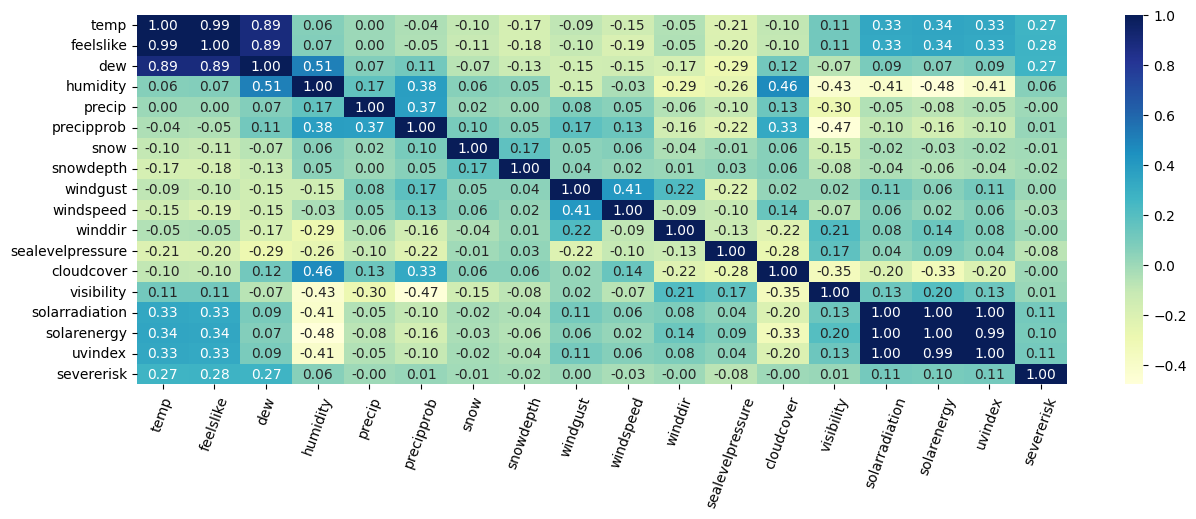

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [13]:
df.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'date'],
      dtype='object')

In [14]:
df.drop(columns=['icon', 'feelslike', 'dew', 'sealevelpressure', 'solarenergy','severerisk', 'windgust'], inplace=True)
df

,name,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,stations,date
0,new york city,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            28463 non-null  object        
 1   datetime        28463 non-null  datetime64[ns]
 2   temp            28463 non-null  float64       
 3   humidity        28463 non-null  float64       
 4   precip          28463 non-null  float64       
 5   precipprob      28463 non-null  int64         
 6   preciptype      3620 non-null   object        
 7   snow            28463 non-null  float64       
 8   snowdepth       28463 non-null  float64       
 9   windspeed       28463 non-null  float64       
 10  winddir         28463 non-null  float64       
 11  cloudcover      28463 non-null  float64       
 12  visibility      28463 non-null  float64       
 13  solarradiation  28463 non-null  float64       
 14  uvindex         28463 non-null  int64         
 15  co

In [16]:
df.drop(columns=['stations'], inplace=True)
df

,name,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,date
0,new york city,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,2023-03-31


In [17]:
df.drop(columns=['name'], inplace=True)
df

,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,date
0,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,2020-01-01
1,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,2020-01-01
2,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,2020-01-01
3,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,2020-01-01
4,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,2023-03-31
28459,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,2023-03-31
28460,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,2023-03-31
28461,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,2023-03-31


In [18]:
df.drop_duplicates(subset='datetime', inplace=True)
df.reset_index(inplace=True, drop=True)

In [19]:
df[['date', 'conditions']].value_counts().sort_index()

date        conditions      
2020-01-01  Clear                3
            Overcast            11
            Partially cloudy     9
            Rain, Overcast       1
2020-01-02  Clear               19
                                ..
2023-03-30  Partially cloudy     2
            Snow, Overcast       1
2023-03-31  Clear                8
            Overcast            13
            Partially cloudy     3
Length: 3731, dtype: int64

In [20]:
df['conditions'].value_counts()

Clear                                            13160
Overcast                                          6319
Partially cloudy                                  6286
Rain, Overcast                                    1854
Rain, Partially cloudy                             453
Rain                                               153
Snow, Rain, Overcast                               114
Snow, Overcast                                      77
Snow, Rain, Partially cloudy                        12
Freezing Drizzle/Freezing Rain, Overcast            11
Snow, Partially cloudy                               7
Snow, Rain                                           6
Ice, Overcast                                        5
Freezing Drizzle/Freezing Rain, Ice, Overcast        2
Rain, Ice, Overcast                                  1
Name: conditions, dtype: int64

In [21]:
most_common = df.groupby('date')['conditions'].apply(lambda x: x.value_counts().index[0]).to_dict()
df['day_condition'] = df['date'].map(most_common)
df['day_condition'].value_counts()

Clear                     15452
Overcast                   6888
Partially cloudy           4704
Rain, Overcast             1248
Snow, Rain, Overcast         96
Rain, Partially cloudy       48
Snow, Overcast               24
Name: day_condition, dtype: int64

In [22]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'precipprob', 'preciptype',
       'snow', 'snowdepth', 'windspeed', 'winddir', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'conditions', 'date', 'day_condition'],
      dtype='object')

In [23]:
df.describe()

,temp,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex
count,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000
mean,56.436943,62.814982,0.002626,9.469431,0.001616,0.152748,6.688960,195.605524,43.035295,9.407656,155.150330,1.535488
std,16.853536,18.540499,0.021789,29.279738,0.023529,1.133151,4.095529,113.406537,43.655735,1.599594,249.706575,2.513502
min,6.400000,10.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,48.440000,0.000000,0.000000,0.000000,0.000000,4.300000,61.000000,0.900000,9.900000,0.000000,0.000000
50%,55.400000,62.350000,0.000000,0.000000,0.000000,0.000000,6.000000,240.000000,23.800000,9.900000,11.000000,0.000000
75%,71.000000,78.390000,0.000000,0.000000,0.000000,0.000000,9.000000,279.000000,98.600000,9.900000,220.000000,2.000000
max,97.000000,99.720000,1.445000,100.000000,1.550000,37.280000,31.300000,360.000000,100.000000,9.900000,1178.000000,10.000000


In [24]:
df.drop(columns=['winddir'], inplace=True)

In [25]:
df.drop(columns=['humidity'], inplace=True)

In [26]:
df.drop(columns=['snow', 'snowdepth'], inplace=True)

In [27]:
df.drop(columns=['solarradiation'], inplace=True)

In [28]:
df['uvindex'].describe()

count    28460.000000
mean         1.535488
std          2.513502
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         10.000000
Name: uvindex, dtype: float64

In [29]:
df.drop(columns=['cloudcover'], inplace=True)

In [30]:
df.drop(columns=['windspeed'], inplace=True)

In [31]:
df.drop(columns=['precip'], inplace=True)

In [32]:
df['precipprob'].apply(lambda x: x/100).value_counts()

0.0    25765
1.0     2695
Name: precipprob, dtype: int64

In [33]:
df['precipprob']= df['precipprob'].apply(lambda x: x/100)

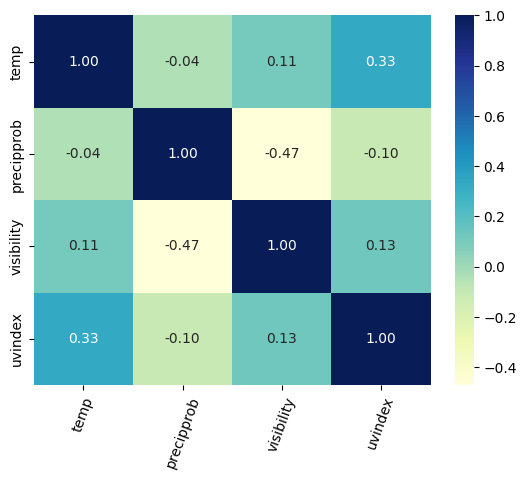

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [35]:
df

,datetime,temp,precipprob,preciptype,visibility,uvindex,conditions,date,day_condition
0,2020-01-01 00:00:00,41.0,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast
1,2020-01-01 01:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
2,2020-01-01 02:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
3,2020-01-01 03:00:00,38.9,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
4,2020-01-01 04:00:00,38.9,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast
...,...,...,...,...,...,...,...,...,...
28455,2023-03-31 19:00:00,51.1,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28456,2023-03-31 20:00:00,48.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28457,2023-03-31 21:00:00,51.2,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28458,2023-03-31 22:00:00,53.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast


In [36]:
df['day_condition'].value_counts()

Clear                     15452
Overcast                   6888
Partially cloudy           4704
Rain, Overcast             1248
Snow, Rain, Overcast         96
Rain, Partially cloudy       48
Snow, Overcast               24
Name: day_condition, dtype: int64

In [37]:
df['day_condition']= df['day_condition'].apply(lambda x: x.split(',')[0])

In [39]:
df[['preciptype', 'day_condition']].value_counts()

preciptype        day_condition   
rain              Overcast            1299
                  Rain                 771
                  Clear                651
                  Partially cloudy     499
snow              Overcast             120
                  Clear                 65
rain,snow         Overcast              59
                  Snow                  49
snow              Snow                  23
rain,snow         Clear                 20
snow              Partially cloudy      13
freezingrain      Overcast               9
rain,snow         Partially cloudy       9
snow              Rain                   8
freezingrain      Rain                   6
ice               Overcast               6
freezingrain      Clear                  4
ice               Rain                   4
freezingrain,ice  Overcast               2
rain,snow         Rain                   1
rain              Snow                   1
rain,ice          Overcast               1
dtype: int64

In [40]:
df

,datetime,temp,precipprob,preciptype,visibility,uvindex,conditions,date,day_condition
0,2020-01-01 00:00:00,41.0,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast
1,2020-01-01 01:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
2,2020-01-01 02:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
3,2020-01-01 03:00:00,38.9,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast
4,2020-01-01 04:00:00,38.9,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast
...,...,...,...,...,...,...,...,...,...
28455,2023-03-31 19:00:00,51.1,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28456,2023-03-31 20:00:00,48.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28457,2023-03-31 21:00:00,51.2,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast
28458,2023-03-31 22:00:00,53.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast


In [42]:
df.describe()

,temp,precipprob,visibility,uvindex
count,28460.000000,28460.000000,28460.000000,28460.000000
mean,56.436943,0.094694,9.407656,1.535488
std,16.853536,0.292797,1.599594,2.513502
min,6.400000,0.000000,0.000000,0.000000
25%,43.000000,0.000000,9.900000,0.000000
50%,55.400000,0.000000,9.900000,0.000000
75%,71.000000,0.000000,9.900000,2.000000
max,97.000000,1.000000,9.900000,10.000000


In [43]:
df.columns

Index(['datetime', 'temp', 'precipprob', 'preciptype', 'visibility', 'uvindex',
       'conditions', 'date', 'day_condition'],
      dtype='object')

In [44]:
df.columns

Index(['datetime', 'temp', 'precipprob', 'preciptype', 'visibility', 'uvindex',
       'conditions', 'date', 'day_condition'],
      dtype='object')

In [46]:
df['date'] = pd.to_datetime(df['date'])

# group by date and calculate min, max, and mean temperature for each group
temp_summary = df.groupby('date')['temp'].agg(['min', 'max', 'mean']).reset_index()
temp_summary.columns=['date','temp_min', 'temp_max', 'temp_mean']

precipprob_summary = df.groupby('date')['precipprob'].agg(['max']).reset_index()
precipprob_summary.columns=['date','precipprob_max']

visibility_summary = df.groupby('date')['visibility'].agg(['min', 'max', 'mean']).reset_index()
visibility_summary.columns=['date','visibility_min', 'visibility_max', 'visibility_mean']

uvindex_summary = df.groupby('date')['uvindex'].agg(['min', 'max', 'mean']).reset_index()
uvindex_summary.columns=['date','uvindex_min', 'uvindex_max', 'uvindex_mean']

temp_summary

,date,temp_min,temp_max,temp_mean
0,2020-01-01,35.1,41.0,38.462500
1,2020-01-02,33.2,48.0,40.587500
2,2020-01-03,44.1,47.1,45.737500
3,2020-01-04,44.0,48.9,46.850000
4,2020-01-05,37.1,44.7,40.245833
...,...,...,...,...
1181,2023-03-27,44.9,57.8,50.579167
1182,2023-03-28,43.9,51.9,47.175000
1183,2023-03-29,42.0,55.1,46.695833
1184,2023-03-30,33.0,48.6,41.091667


In [47]:
# merge the temperature summary back to the original DataFrame
df = pd.merge(df, temp_summary, on='date')
df = pd.merge(df, precipprob_summary, on='date')
df = pd.merge(df, visibility_summary, on='date')
df = pd.merge(df, uvindex_summary, on='date')
df

,datetime,temp,precipprob,preciptype,visibility,uvindex,conditions,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01 00:00:00,41.0,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-01 01:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
2,2020-01-01 02:00:00,39.8,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
3,2020-01-01 03:00:00,38.9,0.0,NaN,9.9,0,Partially cloudy,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
4,2020-01-01 04:00:00,38.9,0.0,NaN,9.9,0,Overcast,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28455,2023-03-31 19:00:00,51.1,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28456,2023-03-31 20:00:00,48.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28457,2023-03-31 21:00:00,51.2,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28458,2023-03-31 22:00:00,53.9,0.0,NaN,9.9,0,Overcast,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 0 to 28459
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         28460 non-null  datetime64[ns]
 1   temp             28460 non-null  float64       
 2   precipprob       28460 non-null  float64       
 3   preciptype       3620 non-null   object        
 4   visibility       28460 non-null  float64       
 5   uvindex          28460 non-null  int64         
 6   conditions       28460 non-null  object        
 7   date             28460 non-null  datetime64[ns]
 8   day_condition    28460 non-null  object        
 9   temp_min         28460 non-null  float64       
 10  temp_max         28460 non-null  float64       
 11  temp_mean        28460 non-null  float64       
 12  precipprob_max   28460 non-null  float64       
 13  visibility_min   28460 non-null  float64       
 14  visibility_max   28460 non-null  float

In [49]:
df.isna().sum()

datetime               0
temp                   0
precipprob             0
preciptype         24840
visibility             0
uvindex                0
conditions             0
date                   0
day_condition          0
temp_min               0
temp_max               0
temp_mean              0
precipprob_max         0
visibility_min         0
visibility_max         0
visibility_mean        0
uvindex_min            0
uvindex_max            0
uvindex_mean           0
dtype: int64

In [50]:
df.columns

Index(['datetime', 'temp', 'precipprob', 'preciptype', 'visibility', 'uvindex',
       'conditions', 'date', 'day_condition', 'temp_min', 'temp_max',
       'temp_mean', 'precipprob_max', 'visibility_min', 'visibility_max',
       'visibility_mean', 'uvindex_min', 'uvindex_max', 'uvindex_mean'],
      dtype='object')

In [51]:
df.drop(columns=['datetime', 'temp', 'precipprob', 'preciptype', 'visibility', 'uvindex',
       'conditions'], inplace=True)

df

,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
2,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
3,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
4,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
28455,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28456,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28457,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28458,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000


In [53]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-02,Clear,33.2,48.0,40.587500,1.0,9.9,9.9,9.900000,0,4,0.833333
2,2020-01-03,Overcast,44.1,47.1,45.737500,1.0,1.7,9.9,7.733333,0,1,0.166667
3,2020-01-04,Overcast,44.0,48.9,46.850000,1.0,0.8,9.9,5.279167,0,1,0.125000
4,2020-01-05,Partially cloudy,37.1,44.7,40.245833,0.0,9.9,9.9,9.900000,0,5,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2023-03-27,Clear,44.9,57.8,50.579167,1.0,9.5,9.9,9.879167,0,8,1.500000
1182,2023-03-28,Overcast,43.9,51.9,47.175000,0.0,9.9,9.9,9.900000,0,10,1.375000
1183,2023-03-29,Clear,42.0,55.1,46.695833,0.0,9.9,9.9,9.900000,0,9,2.541667
1184,2023-03-30,Clear,33.0,48.6,41.091667,1.0,9.9,9.9,9.900000,0,9,2.666667


In [54]:
df.to_csv('../data/weather_clean.csv', index=False)